<a href="https://colab.research.google.com/github/titsitits/Python_Data_Science/blob/master/Exercise_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mickaël Tits
CETIC
mickael.tits@cetic.be

# Exercice Chapitre 1

Corrigez ce code rempli d'erreurs de syntaxes.

In [0]:
prix = 100000
mine = False

while True:
  
prix += 20000
print(prix)
  
  if prix > 150000 and prix < 200000 and mine == False
    print("j'achète")
  mine = True
  
  elif prix > 200000 and mine:
    print("Je 
          revends")
    mine = False
    
  break

In [0]:
prix = 100000
mine = False
while True:
  
  prix += 20000
  print(prix)
  
  if prix > 150000 and prix < 200000 and mine == False:
    print("j'achète")
    mine = True    
  
  elif prix > 200000 and mine:
    print("Je revends")
    mine = False
    
    break
  

# Exercice Chapitre 2

Filtrez la liste de prix ci-dessous, pour ne garder que les prix entre 200000 et 300000.

In [0]:
prices = [50000, 1000, 500000, 200000, 300000, 400000, 260000, 270000]

In [0]:

#Boucle:
filtered = []
for p in prices:
  if p >= 200000 and p <= 300000:
    filtered.append(p)
    
#List-comprehension:
filtered = [p for p in prices if p >= 200000 and p <= 300000 ]

print(filtered)


# Exercice Chapitre 5

## Les maisons plus grandes sont-elles plus chères ?

Divisez les maisons en deux groupes égaux (de part et d'autre de la surface médiane) et utilisez la méthode .describe() pour comparer les prix.

In [0]:
#df["large_houses"] = df.surface > df.surface.median()
#df.groupby("large_houses")["price"].describe()

#ou: (il n'est pas nécessaire d'ajouter une colonne dans le dataframe, 
#il suffit de donner comme argument du groupby une series de la même longueur que le dataframe)

is_large = df.surface > df.surface.median()
df.groupby(is_large)["price"].describe()

#ou directement:
df.groupby(df.surface > df.surface.median())["price"].describe()

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
False,7.0,318571.428571,92453.334432,150000.0,280000.0,320000.0,400000.0,400000.0
True,6.0,406666.666667,164276.190200,230000.0,335000.0,350000.0,447500.0,700000.0


In [0]:
#Bonus: Anova

#Pour avoir un code générique, ou extrait tous les groupes obtenus sous forme d'une liste
groups = df.groupby(is_large)["price"]
group_list = [g[1].values for g in groups]

#La méthode f_oneway prend autant d'arguments que d'échantillon à comparer. Pour transformer une liste en arguments, on utilise le symbole *
stats.f_oneway(*group_list)


F_onewayResult(statistic=1.4810829736928035, pvalue=0.24907116578758384)

In [0]:
#Bonus: corrélation
df[["price","surface"]].corr()

,price,surface
price,1.000000,0.233623
surface,0.233623,1.000000


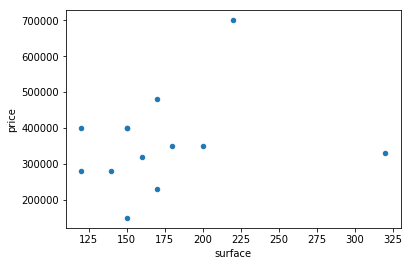

In [0]:
#Bonus: scatter plot (plus de détails au chapitre suivant)
df.plot.scatter("surface","price")

# Exercices Chapitre 6

## 1. Recherchez les maisons ayant un prix anormal

Cherchez les maisons ayant un prix s'écartant fortement du IQR (inter-quantile range).

Solution: vous devriez trouver une maison à 700000€.



### Solution Exercice 1

In [0]:
#Inter-quantile range
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
h = 2
print("limits:", (Q1 - h * IQR), "to", (Q3 + h * IQR))

#Les données s'écartant fortement des quantiles sont potentiellement des anomalies (outlier en anglais)
is_outlier = (df.price < (Q1 - h * IQR)) | (df.price > (Q3 + h * IQR))
df.loc[is_outlier]


On retrouve la maison de la Rue de la Loi 50 à Bruxelles qui est effectivement beaucoup plus chère que toutes les autres.

## 2. Définissez une fonction générique permettant de détecter les anomalies sur n'importe quelle colonne numérique

Modularisez le code écrit à l'exercice précédent pour le rendre générique.



### Solution Exercice 2

In [0]:
def detect_outliers(df, column, h = 2, left = 0.25, right = 0.75):
    
  Q1 = df[column].quantile(left)
  Q3 = df[column].quantile(right)
  IQR = Q3 - Q1
  #print("limits:", (Q1 - h * IQR), "to", (Q3 + h * IQR))

  #Les données s'écartant fortement des quantiles sont potentiellement des anomalies (outlier en anglais)
  is_outlier = (df[column] < (Q1 - h * IQR)) | (df[column] > (Q3 + h * IQR))
  outliers = df.loc[is_outlier]
  
  if len(outliers) > 0:    
    print("Anomalies en terme de", column, ":")
    display(outliers)
  
  return outliers

out = detect_outliers(df, 'price')
out = detect_outliers(df, 'surface')

#### Solution plus robuste: assertion du type

In [0]:
def detect_outliers(df, column, h = 2, left = 0.25, right = 0.75):
  
  """
  df: un DataFrame pandas
  col: nom de la colonne du dataframe à analyser (string)
  """
  
  #On peut éventuellement vérifier les types des arguments  
  if type(column) != str:
    raise Exception("L'argument 'col' doit être un string")
  
  #l'instruction "assert" permet de directement générer une exception si une condition n'est pas respectée:
  #assert <condition>, <exception message if condition not respected>
  assert type(column) == str, "L'argument 'col' doit être un string"
  assert type(df) == pd.DataFrame, "L'argument 'df' doit être un DataFrame pandas"
    
  Q1 = df[column].quantile(left)
  Q3 = df[column].quantile(right)
  IQR = Q3 - Q1
  #print("limits:", (Q1 - h * IQR), "to", (Q3 + h * IQR))

  #Les données s'écartant fortement des quantiles sont potentiellement des anomalies (outlier en anglais)
  is_outlier = (df[column] < (Q1 - h * IQR)) | (df[column] > (Q3 + h * IQR))
  outliers = df.loc[is_outlier]
  
  if len(outliers) > 0:    
    print("Anomalies en terme de", column, ":")
    display(outliers)
  
  return outliers

out = detect_outliers(df, 'price')
out = detect_outliers(df, 'surface')

#Erreur d'assertion
try:
  out = detect_outliers(42, 'surface')
except Exception as e:
  print(e)

## 3. Définissez une fonction générique permettant de détecter les anomalies sur une colonne catégorielle

Pour les variables catégorielles, vous pouvez simplement détecter une catégorie particulièrement rare (nombre d'occurrences plus petit qu'un seuil nmin). 


### Solution Exercice 3

In [0]:
#variables catégorielles (le nombre de chambres peut être considéré comme variable catégorielle aussi)
def detect_rare_cat(df, column, nmin = 2):
  
  """
  Cette fonction permet de détecter des outliers dans des variables catégorielles
  """
  
  counts = df.groupby(column)['price'].count()
  rare_cats = counts[counts < nmin]
  outliers = df[df[column].isin(rare_cats.index)]
  
  if len(outliers) > 0:    
    print("Anomalies en terme de", column, ":")
    display(outliers)
  
  return outliers

out = detect_rare_cat(df, 'city')

## 4. Détectez automatiquement le type d'une variable

Indice: vous pouvez aussi définir une variable comme catégorielle si elle compte un nombre limité de valeurs uniques. (Utilisez la méthode pd.Series.unique())
Attention: le nombre de chambres 'rooms' peut à la fois être considéré comme catégoriel et numérique. Utilisez la méthode pd.DataFrame. 
Indice: pour vérifier si une colonne est numérique, vous pouvez essayer de la convertir en float: series.astype(float) et rediriger l'erreur.


### Solution Exercice 4

In [0]:
def is_cat(series, relative_threshold = 0.5, absolute_threshold = 20):
  
  nvalues = len(series)  
  ncats = len(series.unique())
  
  #On considère la variable comme catégorielle si le nombre de valeurs uniques et plus petit qu'un seuil relatif ou absolu
  return (ncats/nvalues <= relative_threshold) and (ncats <= absolute_threshold)

def is_num(series):
  try:
    series.astype(float)
    return True
  except:
    return False

is_categorical = df.apply(is_cat)
is_numeric = df.apply(is_num)
is_numeric


## 5. Recherchez les anomalies de manière systématique

### Solution Exercice 5

#### Solution simple
Pour chaque colonne (boucle for), on vérifie le type de la variable (catégorielle et/ou numérique), et on détecte les outliers selon le type.

In [0]:
cols = df.columns

for col in cols:
  
  #Détection d'outliers pour les variables catégorielles
  if is_cat(df[col]):
    outliers = detect_rare_cat(df, col)
    
    if len(outliers) == 0:
      print("No categorical outlier detecter for columns", col)
  
  #Détection d'outliers pour les variables numériques
  if is_num(df[col]):
    outliers = detect_outliers(df, col)
    
    if len(outliers) == 0:
      print("No numeric outlier detecter for columns", col)

#### Solution plus complète
On ressemble tous outliers (et leurs ids), en omettant les doublons. On peut ensuite les supprimer du dataframe.


In [0]:
cat_cols = is_categorical[is_categorical == True].index
num_cols = is_numeric[is_numeric == True].index


#Pour chaque colonne catégorielle, on extrait lest outliers
cat_outliers = [detect_rare_cat(df, cat) for cat in cat_cols]
#rassemblons les outliers dans un seul dataframe (nous pouvons retirer les doublons)
cat_outliers = pd.concat(cat_outliers).drop_duplicates()

#Pour chaque colonne numérique, on extrait les outliers
num_outliers = [detect_outliers(df, c) for c in num_cols]
#Rassemblons les outliers trouvés dans un seul dataframe 
num_outliers = pd.concat(num_outliers).drop_duplicates()


#Rassemblons tous les outliers
outliers = pd.concat([num_outliers, cat_outliers]).drop_duplicates()
print("Tous les outliers:")
display(outliers)

#On supprime les outliers (à partir de leur index)
df_filtered = df.drop(outliers.index)

print("Dataframe filtré:")
display(df_filtered)

#### Solution alternative
On peut définir des fonctions s'appliquant directement sur une Series, et renvoyant un Series de booléens pour chaque item. On peut alors utiliser la méthode "apply" pour extraire toutes les détections d'anomalies d'un coup. De plus, on peut ainsi vérifier le nombre de fois qu'une observation (une maison) a été reconnue comme anormale, et en extraire un indice plus global d'anormalité.

In [0]:
#Définissons des fonctions de détection d'outliers sur des Series, pour pouvoir utiliser la méthode "apply" dessus:

def is_cat(series, relative_threshold = 0.5, absolute_threshold = 20):
  
  nvalues = len(series)  
  ncats = len(series.unique())
  
  #On considère la variable comme catégorielle si le nombre de valeurs uniques et plus petit qu'un seuil relatif ou absolu
  return (ncats/nvalues <= relative_threshold) and (ncats <= absolute_threshold)

def is_num(series):
  try:
    series.astype(float)
    return True
  except:
    return False

#Détection d'outliers numériques
def detect_numeric_outliers_series(series, h = 2, left = 0.25, right = 0.75):

  
  Q1 = series.quantile(left)
  Q3 = series.quantile(right)
  IQR = Q3 - Q1
  
  #Les données s'écartant fortement des quantiles sont potentiellement des anomalies (outlier en anglais)
  is_outlier = (series < (Q1 - h * IQR)) | (series > (Q3 + h * IQR))
  if is_outlier.sum() > 0:
    print(is_outlier.sum(), "outliers numériques trouvés pour", series.name)
  return is_outlier

#Détection d'outliers catégoriels: on identifie une catégorie rare si elle représente moins de 1% (seuil relatif) des données
def detect_rare_cat_series(series, relative_threshold = 0.01, nmin = 2):
  counts = series.value_counts()
  
  #on garde la contrainte la plus souple (< rel_th% des données, ou < nmin)
  relative_nmin = relative_threshold*len(series)
  tot_nmin = max(nmin, relative_nmin)
  
  
  is_rare = (counts <  tot_nmin)
  rare_cats = counts[is_rare]
  is_outlier = series.isin(rare_cats.index)
  if is_outlier.sum() > 0:
    print(is_outlier.sum(), "outliers catégoriels trouvés pour", series.name)
  return is_outlier


#Détection générique des outliers dans une Series
def detect_outlier_series(series):
  
  """
  Il vaut mieux privilégier la représentation catégorielle plutôt que numérique.
  En effet, il existe peu de valeurs différentes, la détection numérique peut ne pas être efficace:
  E.G.: pour une variable binaire dont 20% des données sont 0, on détectera 20% d'outliers (IQR = 0)
  """
  if is_cat(series):
    return detect_rare_cat_series(series)  
  elif is_num(series):
    return detect_numeric_outliers_series(series)

  else:
    #return a Series containing only False
    return pd.Series(False, series.index)


  
outliers = df.apply(detect_outlier_series)



In [0]:
#De cette manière, on peut observer le nombre de fois qu'une maison est considérée comme anormale
outlier_sum = outliers.sum(axis = 1) 
outlier_sum.plot.bar()
plt.xticks(range(len(df.address)), labels = df.address, rotation = "vertical")

#On peut vérifier pour quelles variables chaque maison est considérée comme anormale
display(outliers)

#Outliers
display(df[outlier_sum > 0])

On remarque que la maison de la Rue de la Loi 50, Bruxelles, et celle de charleroi sont considérées deux fois comme des outliers.